In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\yalam\\OneDrive\\Desktop\\SuperStore_Sales_Dataset.csv")

In [3]:
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


In [4]:
df.shape

(5901, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


In [6]:
# Rename strange column
df.rename(columns={"Row ID+O6G3A1:R6": "Row ID"}, inplace=True)

# Convert to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=True)

# Drop unnecessary columns
df.drop(columns=["ind1", "ind2", "Returns"], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         5901 non-null   int64         
 1   Order ID       5901 non-null   object        
 2   Order Date     5901 non-null   datetime64[ns]
 3   Ship Date      5901 non-null   datetime64[ns]
 4   Ship Mode      5901 non-null   object        
 5   Customer ID    5901 non-null   object        
 6   Customer Name  5901 non-null   object        
 7   Segment        5901 non-null   object        
 8   Country        5901 non-null   object        
 9   City           5901 non-null   object        
 10  State          5901 non-null   object        
 11  Region         5901 non-null   object        
 12  Product ID     5901 non-null   object        
 13  Category       5901 non-null   object        
 14  Sub-Category   5901 non-null   object        
 15  Product Name   5901 n

In [8]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Profit
count,5901.000000,5901,5901,5901.000000,5901.000000,5901.000000
mean,5022.422471,2020-02-29 01:53:57.620742144,2020-03-04 00:08:47.097102336,265.345589,3.781901,29.700408
min,1.000000,2019-01-01 00:00:00,2019-01-05 00:00:00,0.836000,1.000000,-6599.978000
25%,2486.000000,2019-09-11 00:00:00,2019-09-15 00:00:00,71.976000,2.000000,1.795500
50%,5091.000000,2020-03-16 00:00:00,2020-03-19 00:00:00,128.648000,3.000000,8.502500
75%,7456.000000,2020-09-14 00:00:00,2020-09-16 00:00:00,265.170000,5.000000,28.615000
max,9994.000000,2020-12-31 00:00:00,2021-01-05 00:00:00,9099.930000,14.000000,8399.976000
std,2877.977184,NaN,NaN,474.260645,2.212917,259.589138


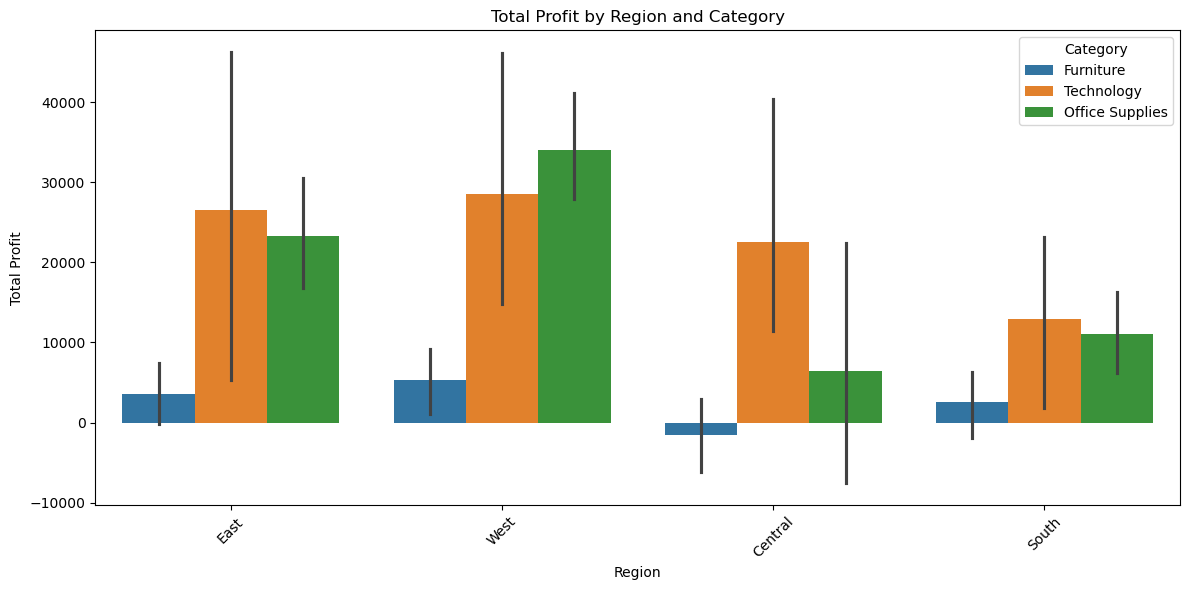

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Region', y='Profit', hue='Category', estimator='sum')
plt.title("Total Profit by Region and Category")
plt.ylabel("Total Profit")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

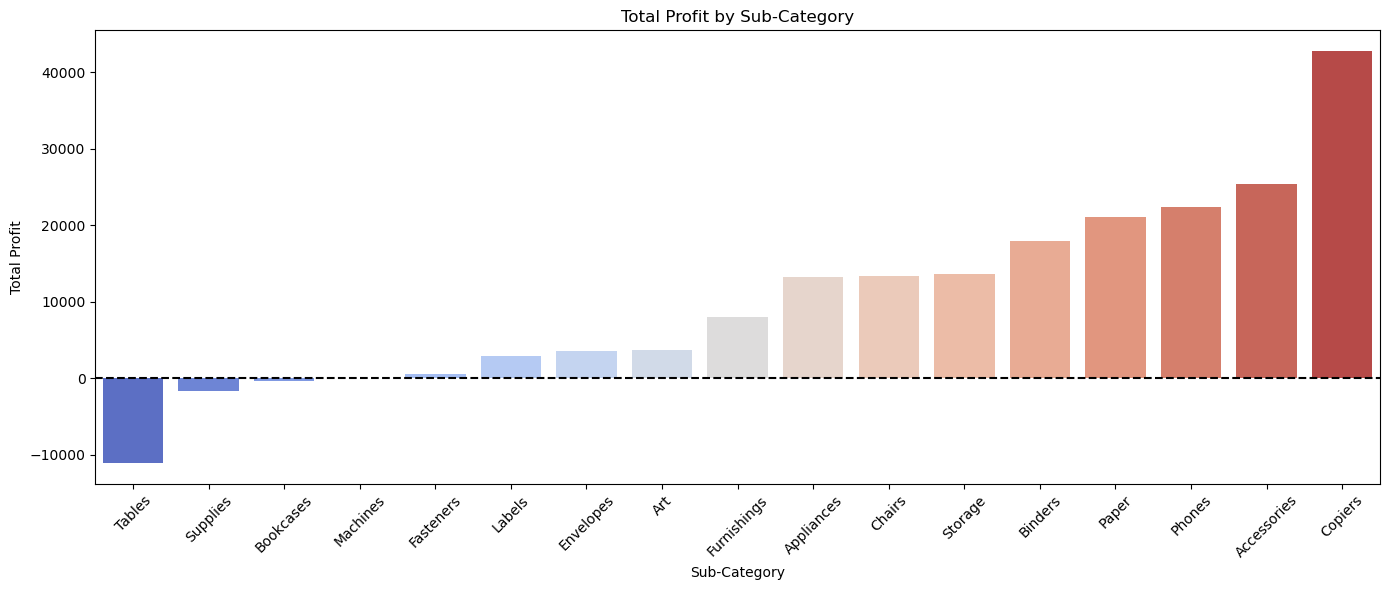

In [10]:
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values().reset_index()

subcategory_profit['Hue'] = subcategory_profit['Sub-Category']

plt.figure(figsize=(14, 6))
sns.barplot(data=subcategory_profit, x='Sub-Category', y='Profit', hue='Hue', dodge=False, palette='coolwarm', legend=False)
plt.title("Total Profit by Sub-Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

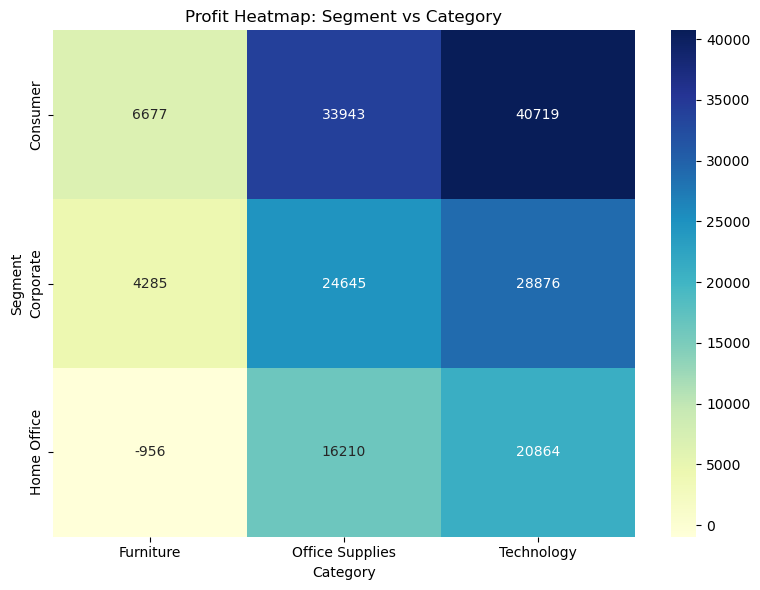

In [11]:
pivot = df.pivot_table(index='Segment', columns='Category', values='Profit', aggfunc='sum')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")

plt.title("Profit Heatmap: Segment vs Category")
plt.ylabel("Segment")
plt.xlabel("Category")

plt.tight_layout()
plt.show()


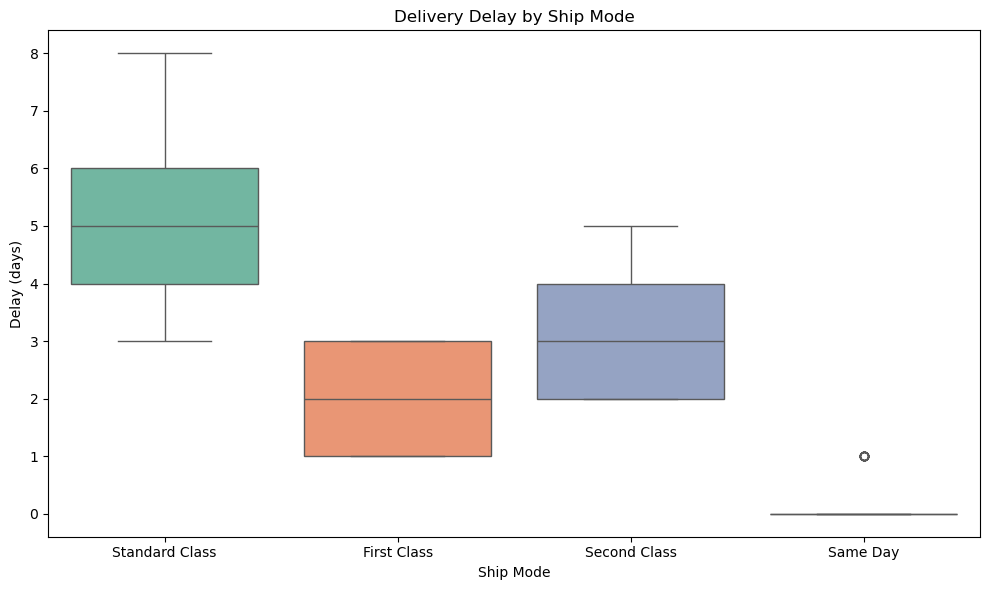

In [12]:
df['Delivery Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

df['Hue'] = df['Ship Mode']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Ship Mode', y='Delivery Delay', hue='Hue', palette='Set2', dodge=False, legend=False)
plt.title("Delivery Delay by Ship Mode")
plt.ylabel("Delay (days)")
plt.tight_layout()
plt.show()


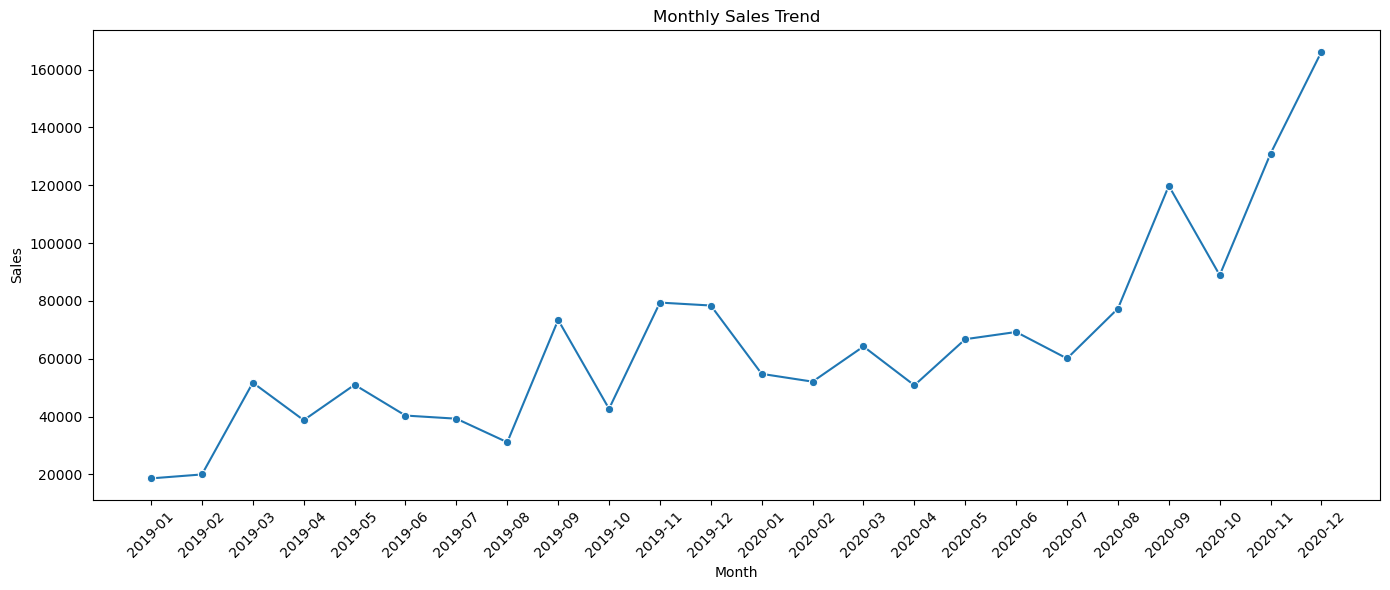

In [13]:
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)

monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

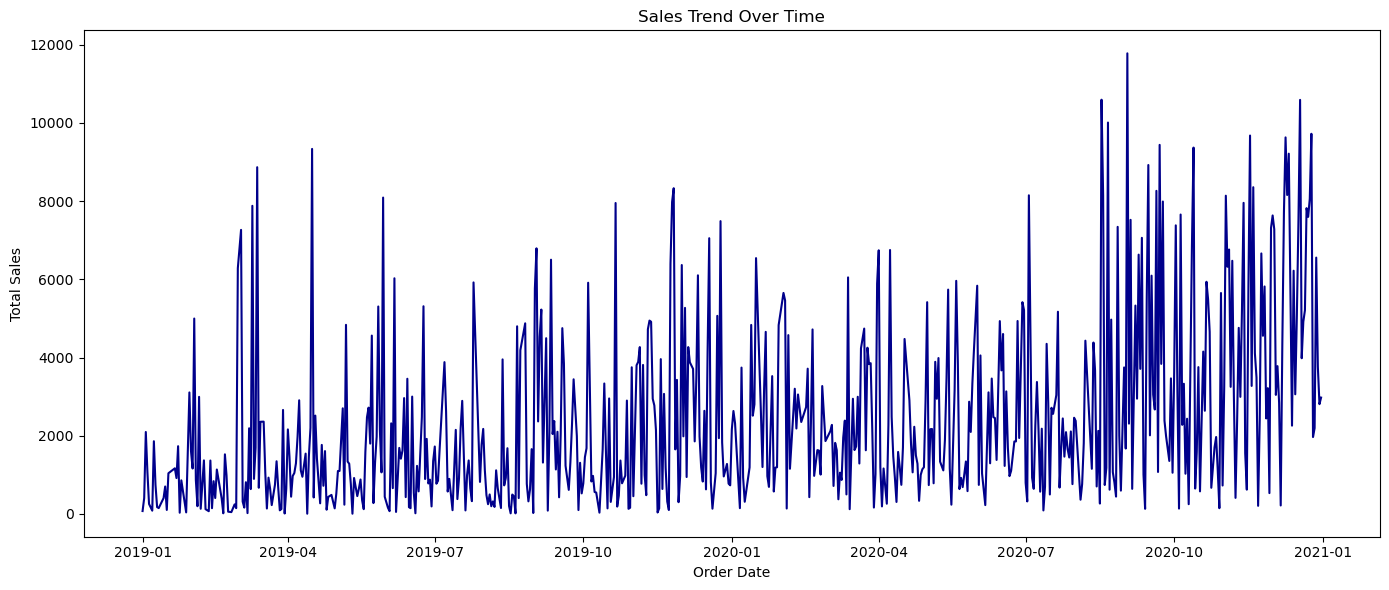

In [14]:
# Grouping data by Order Date
df_trend = df.groupby('Order Date')['Sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_trend, x='Order Date', y='Sales', color='darkblue')
plt.title("Sales Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

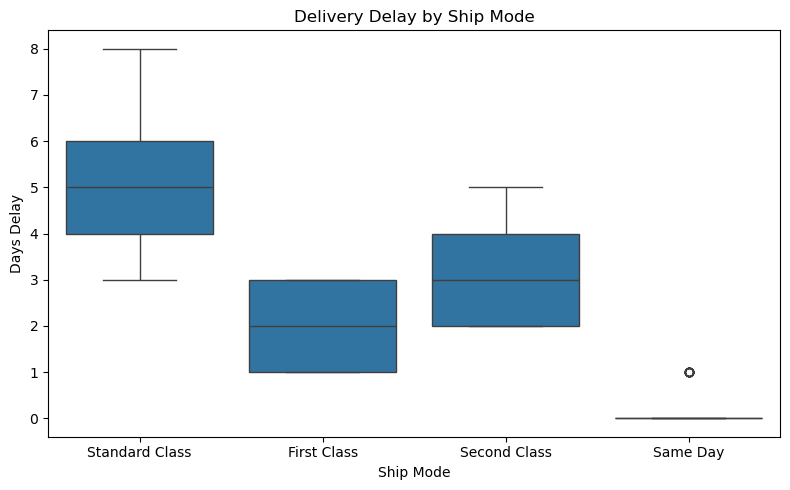

In [15]:
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Ship Mode', y='Shipping Delay')
plt.title("Delivery Delay by Ship Mode")
plt.ylabel("Days Delay")
plt.xlabel("Ship Mode")
plt.tight_layout()
plt.show()

## Kpi Dashboards

In [17]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_sales = df['Sales'].mean()
avg_profit = df['Profit'].mean()
unique_customers = df['Customer ID'].nunique()

print(f"🧾 Total Sales: ₹{total_sales:,.2f}")
print(f"📈 Total Profit: ₹{total_profit:,.2f}")
print(f"📊 Average Sales per Order: ₹{avg_sales:,.2f}")
print(f"💰 Average Profit per Order: ₹{avg_profit:,.2f}")
print(f"👥 Unique Customers: {unique_customers}")

🧾 Total Sales: ₹1,565,804.32
📈 Total Profit: ₹175,262.11
📊 Average Sales per Order: ₹265.35
💰 Average Profit per Order: ₹29.70
👥 Unique Customers: 773


In [18]:
region_category_pivot = df.pivot_table(
    values=['Sales', 'Profit'],
    index='Category',
    columns='Region',
    aggfunc='sum'
).round(2)

print(region_category_pivot)

                   Profit                                    Sales             \
Region            Central      East     South      West    Central       East   
Category                                                                        
Furniture        -1534.79   3621.50   2562.02   5357.88  105505.45  117071.97   
Office Supplies   6477.63  23248.61  11104.98  33966.03  150154.35  189066.82   
Technology       22507.17  26530.31  12884.72  28536.05   85347.72  144095.87   

                                      
Region              South       West  
Category                              
Furniture        72984.87  155946.35  
Office Supplies  99652.14  204834.37  
Technology       79484.07  161660.33  


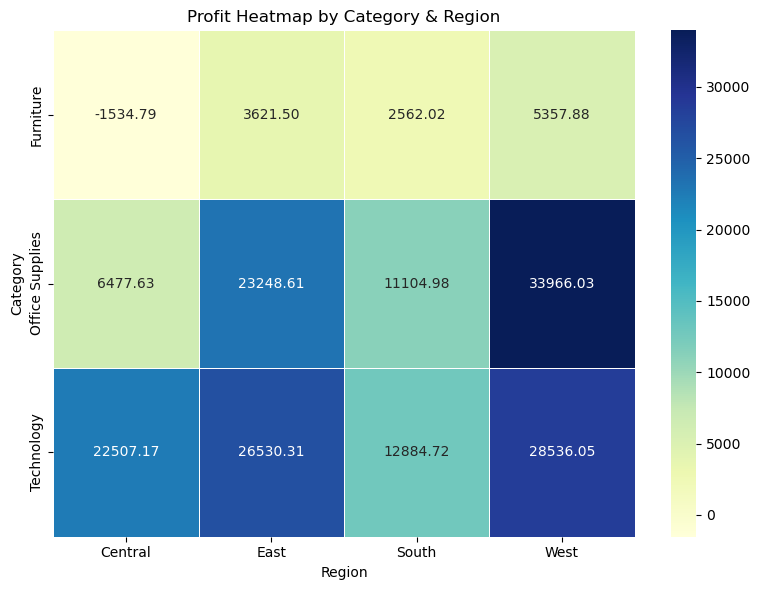

In [19]:
profit_heatmap = df.pivot_table(
    values='Profit',
    index='Category',
    columns='Region',
    aggfunc='sum'
).round(2)

plt.figure(figsize=(8, 6))
sns.heatmap(profit_heatmap, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title("Profit Heatmap by Category & Region")
plt.ylabel("Category")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

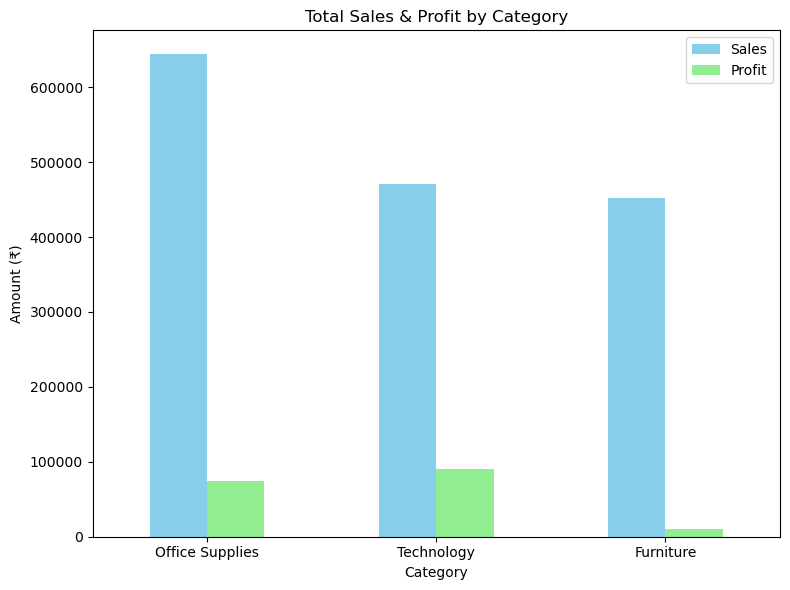

In [20]:
category_summary = df.groupby('Category')[['Sales', 'Profit']].sum().round(2).sort_values(by='Sales', ascending=False)

category_summary.plot(kind='bar', figsize=(8,6), color=['skyblue', 'lightgreen'])
plt.title("Total Sales & Profit by Category")
plt.xlabel("Category")
plt.ylabel("Amount (₹)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

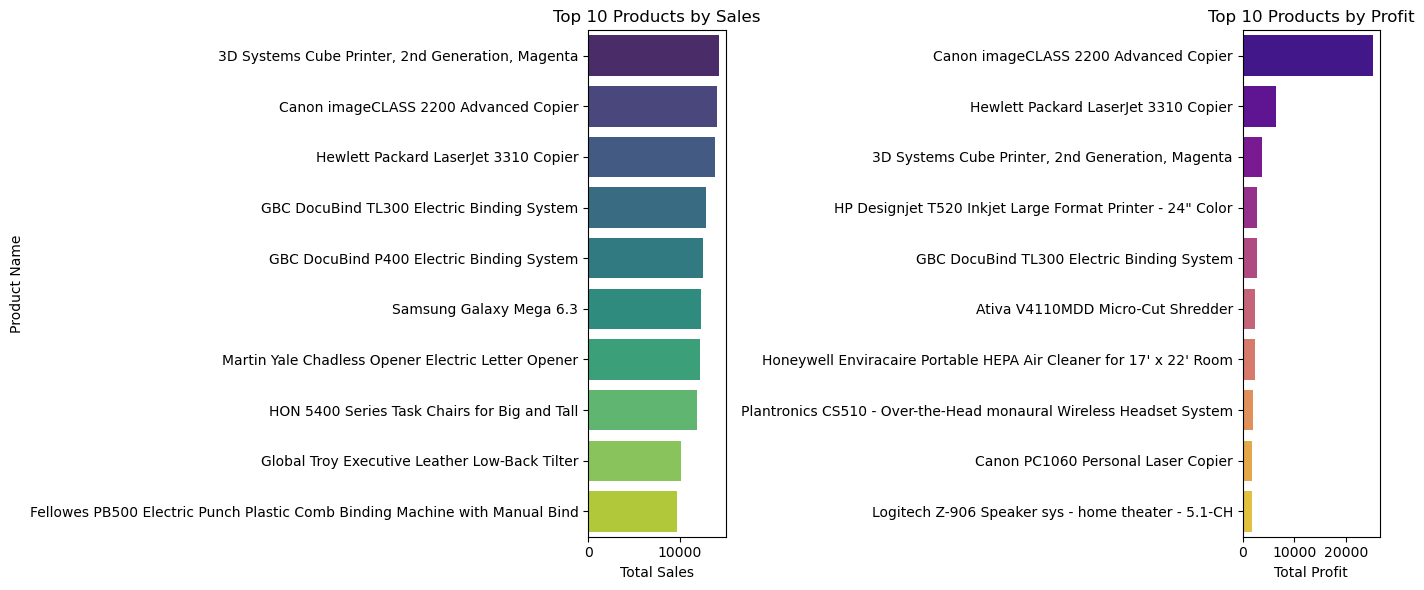

In [21]:
# 🔝 Top 10 Products by Total Sales
top_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# 🥇 Top 10 Products by Total Profit
top_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

# 🖼️ Plotting
plt.figure(figsize=(14, 6))

# Sales Chart
plt.subplot(1, 2, 1)
sns.barplot(x=top_sales.values, y=top_sales.index, hue=top_sales.index, palette='viridis', dodge=False, legend=False)  # Added hue
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")

# Profit Chart
plt.subplot(1, 2, 2)
sns.barplot(x=top_profit.values, y=top_profit.index, hue=top_profit.index, palette='plasma', dodge=False, legend=False)  # Added hue
plt.title("Top 10 Products by Profit")
plt.xlabel("Total Profit")
plt.ylabel("")

plt.tight_layout()
plt.show()
